In [30]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pyreadstat
import math

%matplotlib inline

In [4]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_columns", None)

# IMPORTING DATA

In [6]:
music, meta = pyreadstat.read_sav("music.sav")

# QUICK DATA EXPLORATION

In [7]:
## quickly check a couple of rows
music.head()

,Participantcode,Missing,Countries,Gender,Age,marital_status,living_situation,highest_education,current_occupation,occ_student,occ_retired,occ_working,occ_unemployed,occ_voluntary_work,occ_other,religiousness,hob_music,hob_internet,hob_tv,hob_crossword,hob_reading,hob_sport,hob_walking,hob_art,hob_gardening,hob_out_meals,hob_out_friends,chob_soc_clubs,music_education,music_edu_type,music_edu_instrument,music_edu_singing,music_edu_dancing,music_importance,listening_freq,singing_freq,instrument_freq,dancing_freq,listening_minutes,access_to_music_content,emo_to_mus_happy,emo_to_mus_nostalgic,emo_to_mus_moved,emo_to_mus_angry,emo_to_mus_sad,emo_to_mus_thrills,emo_to_mus_relax,hearing_problems,financial_worry,supp_family,supp_friends,supp_sign_other,extroversion,neuroticism,conscientiousness,agreeableness,openness_exp,Laukka_identity_agency,Laukka_mood_regulation,Laukka_relaxation_company,Laukka_enjoyment,Barcelona_total,Barcelona_MS,Barcelona_EE,Barcelona_MR,Barcelona_SM,Barcelona_SR_without_item6,PANAS_P,PANAS_N,SF_emotional_wb,SF_role_limit_due_emot_probl,SF_general_health,DERS_strategies,DERS_non_acceptance,DERS_impulse,DERS_goals,DERS_awareness,DERS_clarity,cd_risc_mean,SWLS_mean,Marital_status_married,marital_dummy_single,marital_dummy_divorced,marital_dummy_widowed,livingsit_dummy_alone,livingsit_dummy_assisted
0,BIH_19,NaN,1.0,2.0,65.0,2.0,2.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,5.0,6.0,7.0,1.0,4.0,1.0,1.0,1.0,7.0,5.0,2.0,NaN,0.0,0.0,0.0,6.0,7.0,4.0,3.0,2.0,NaN,4.0,7.0,6.0,4.0,1.0,3.0,5.0,6.0,1.0,6.0,5.00,5.00,3.25,3.0,2.0,4.0,4.0,3.0,2.666667,3.333333,2.20,3.00,3.684211,5.00,NaN,3.00,2.75,2.666667,34.0,21.0,4.0,33.333333,25.0,2.333333,2.000000,3.000000,3.333333,1.666667,2.333333,3.7,4.8,1.0,0.0,0.0,0.0,0.0,0.0
1,CZ_51,NaN,2.0,1.0,65.0,2.0,2.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,7.0,7.0,7.0,2.0,7.0,6.0,5.0,1.0,2.0,2.0,4.0,1.0,2.0,NaN,0.0,0.0,0.0,6.0,7.0,4.0,1.0,2.0,480.0,7.0,5.0,4.0,4.0,1.0,1.0,3.0,6.0,1.0,1.0,6.25,6.00,6.75,4.0,3.0,4.0,3.0,4.5,1.500000,2.000000,2.60,4.00,3.800000,3.75,3.25,4.25,3.75,4.000000,22.0,10.0,0.0,0.000000,30.0,1.000000,1.666667,2.000000,1.333333,3.333333,1.000000,4.5,5.2,1.0,0.0,0.0,0.0,0.0,0.0
2,CZ_56,NaN,2.0,2.0,65.0,2.0,2.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,7.0,6.0,7.0,7.0,5.0,5.0,1.0,4.0,4.0,5.0,1.0,2.0,NaN,0.0,0.0,0.0,4.0,7.0,2.0,1.0,1.0,120.0,6.0,6.0,5.0,5.0,1.0,2.0,6.0,6.0,1.0,2.0,6.00,6.00,6.00,3.5,3.0,2.5,2.5,4.0,2.666667,3.166667,2.80,4.00,3.600000,3.00,3.75,4.00,3.25,4.000000,20.0,NaN,36.0,100.000000,35.0,1.000000,1.666667,2.000000,2.000000,4.000000,2.000000,2.9,3.8,1.0,0.0,0.0,0.0,0.0,0.0
3,CZ_67,NaN,2.0,1.0,65.0,3.0,1.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,7.0,6.0,7.0,2.0,2.0,4.0,3.0,2.0,3.0,5.0,4.0,5.0,2.0,NaN,0.0,0.0,0.0,5.0,7.0,5.0,3.0,3.0,450.0,7.0,4.0,2.0,4.0,2.0,1.0,6.0,5.0,1.0,1.0,5.00,4.25,7.00,2.5,3.5,3.5,3.0,4.0,1.666667,2.000000,2.60,4.00,3.000000,2.25,3.00,3.50,3.00,3.333333,30.0,NaN,12.0,NaN,40.0,2.000000,2.000000,1.333333,2.333333,4.000000,1.333333,3.4,5.8,0.0,0.0,0.0,1.0,1.0,0.0
4,CZ_72,NaN,2.0,2.0,65.0,2.0,2.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,6.0,7.0,6.0,6.0,2.0,6.0,NaN,7.0,2.0,6.0,2.0,2.0,NaN,0.0,0.0,0.0,4.0,7.0,2.0,1.0,2.0,60.0,6.0,5.0,3.0,3.0,3.0,4.0,4.0,5.0,1.0,3.0,6.00,5.25,5.25,3.5,3.5,4.0,2.5,3.0,2.833333,2.600000,3.25,3.25,3.578947,NaN,3.25,4.00,3.75,3.333333,NaN,21.0,32.0,100.000000,55.0,2.000000,2.666667,2.000000,2.666667,2.000000,2.333333,3.1,4.6,1.0,0.0,0.0,0.0,0.0,0.0


In [8]:
## all columns to lowercase
music.columns = [var.lower() for var in music.columns]

In [9]:
## no of rows and column
music.shape

(188, 86)

In [10]:
## variables
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 86 columns):
participantcode                 188 non-null object
missing                         12 non-null float64
countries                       188 non-null float64
gender                          187 non-null float64
age                             188 non-null float64
marital_status                  188 non-null float64
living_situation                187 non-null float64
highest_education               187 non-null float64
current_occupation              186 non-null float64
occ_student                     186 non-null float64
occ_retired                     186 non-null float64
occ_working                     186 non-null float64
occ_unemployed                  186 non-null float64
occ_voluntary_work              186 non-null float64
occ_other                       186 non-null float64
religiousness                   185 non-null float64
hob_music                       180 non-null floa

In [11]:
## original index values
music.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [13]:
## set index to participant code
music.set_index("participantcode", inplace=True)
music.index.values

array(['BIH_19', 'CZ_51', 'CZ_56', 'CZ_67', 'CZ_72', 'GE_02', 'GE_08',
       'GE_13', 'GE_15', 'GE_17', 'GE_22', 'GE_30_B', 'BIH_13', 'CZ_10r',
       'CZ_18', 'CZ_44', 'CZ_61', 'CZ_64', 'CZ_77', 'GE_17_B', 'GE_21',
       'GE_23', 'UK_03', 'CZ_03Rr', 'CZ_05', 'CZ_11', 'CZ_13', 'CZ_14',
       'CZ_15r', 'CZ_25', 'CZ_34', 'CZ_49', 'CZ_52', 'CZ_54', 'CZ_71',
       'GE_18', 'GE_18_B', 'GE_24', 'GE_25', 'GE_36_B', 'IE_18', 'BIH_05',
       'BIH_38', 'CZ_33', 'GE_16', 'GE_25_B', 'IE_10', 'BIH_08', 'CZ_16',
       'CZ_21r', 'CZ_42', 'CZ_48', 'GE_12', 'GE_26_Br', 'IE_21', 'IE_3',
       'IE_7', 'BIH_12', 'CZ_07', 'CZ_22', 'CZ_24', 'CZ_35r', 'CZ_40',
       'GE_23_Br', 'GE_24_B', 'GE_31_B', 'GE_33_B', 'IE_30', 'BIH_06',
       'BIH_39', 'CZ_27', 'CZ_41', 'CZ_45', 'CZ_50', 'CZ_57r', 'GE_04',
       'IE_16r', 'IE_2', 'IE_26', 'BIH_03', 'BIH_35', 'CZ_32', 'CZ_70',
       'GE_01', 'IE_25', 'BIH_18', 'BIH_24', 'CZ_12', 'CZ_38', 'CZ_53',
       'CZ_63', 'CZ_68', 'GE_03', 'GE_11', 'GE_14', 'GE_27_B

Missings = 30% out of 188 = 56.40 

In [14]:
## number of missings per column
music.isnull().sum()

missing                         176
countries                         0
gender                            1
age                               0
marital_status                    0
living_situation                  1
highest_education                 1
current_occupation                2
occ_student                       2
occ_retired                       2
occ_working                       2
occ_unemployed                    2
occ_voluntary_work                2
occ_other                         2
religiousness                     3
hob_music                         8
hob_internet                     11
hob_tv                            7
hob_crossword                     6
hob_reading                       6
hob_sport                         6
hob_walking                       2
hob_art                          16
hob_gardening                     3
hob_out_meals                     4
hob_out_friends                   2
chob_soc_clubs                    5
music_education             

# CATEGORICAL VARIABLES

## Preprocessing

In [15]:
## setting up categories
music["countries"] = music["countries"].map({1.0:"Bosnia", 
                                             2.0:"Czechia", 
                                             3.0:"Germany", 
                                             4.0:"Ireland", 
                                             5.0:"UK"})

music["missing"] = music["missing"].map({1.0:"Participant Profile",
                                        2.0:"Music Profile",
                                        3.0:"Well-being Profile",
                                        4.0:"Both"})

music["gender"] = music["gender"].map({1.0:"Male", 2.0:"Female"})

music["marital_status"] = music["marital_status"].map({1.0:"Single",
                                                      2.0:"Married",
                                                      3.0:"Widowed",
                                                      4.0:"Divorced",
                                                      5.0:"Other"})

music["living_situation"] = music["living_situation"].map({1.0:"Alone",
                                                          2.0:"Family",
                                                          3.0:"Assisted Living",
                                                          4.0:"Other"})

music["highest_education"] = music["highest_education"].map({1.0:"Elementary",
                                                             2.0:"Lower Secondary",
                                                             3.0:"Higher Secondary",
                                                             4.0:"University", 
                                                             5.0:"Other"})

music["current_occupation"] = music["current_occupation"].map({1.0:"Student",
                                                               2.0:"Retired",
                                                               3.0:"Working",
                                                               4.0:"Unemployed", 
                                                               5.0:"Voluntary Work",
                                                               6.0:"Other"})

music["music_education"] = music["music_education"].map({1.0:"Yes",
                                                         2.0:"No"})

music["music_edu_type"] = music["music_edu_type"].map({1.0:"Playing an Instrument",
                                                       2.0:"Singing",
                                                       3.0:"Dancing"})

music["hearing_problems"] = music["hearing_problems"].map({1.0:"No",
                                                          2.0:"Yes",
                                                          3.0:"Hearing device"})

In [58]:
## changing columns to categorical
cat_dtype = pd.api.types.CategoricalDtype(ordered=True)
cat_col = ["missing", "countries", "gender", "marital_status", 
            "living_situation", "highest_education", "current_occupation", 
            "music_education", "music_edu_type", "hearing_problems"]

for col in cat_col:
    music[col] = music[col].astype(cat_dtype)

In [17]:
for col in cat_col:
    display(music[col].cat.categories)

Index(['Both', 'Music Profile', 'Well-being Profile'], dtype='object')

Index(['Bosnia', 'Czechia', 'Germany', 'Ireland', 'UK'], dtype='object')

Index(['Female', 'Male'], dtype='object')

Index(['Divorced', 'Married', 'Other', 'Single', 'Widowed'], dtype='object')

Index(['Alone', 'Assisted Living', 'Family', 'Other'], dtype='object')

Index(['Elementary', 'Higher Secondary', 'Lower Secondary', 'Other',
       'University'],
      dtype='object')

Index(['Retired', 'Unemployed', 'Working'], dtype='object')

Index(['No', 'Yes'], dtype='object')

Index(['Dancing', 'Playing an Instrument', 'Singing'], dtype='object')

Index(['Hearing device', 'No', 'Yes'], dtype='object')

In [18]:
## reordering categories
music["highest_education"].cat.reorder_categories(new_categories = ["Elementary", 
                                                                    "Lower Secondary",
                                                                    "Higher Secondary",
                                                                    "University",
                                                                    "Other"], 
                                                                    inplace=True)

music["marital_status"].cat.reorder_categories(new_categories = ["Single","Married","Widowed","Divorced","Other"], 
                                                                    inplace=True)

music["living_situation"].cat.reorder_categories(new_categories = ["Alone","Family","Assisted Living","Other"], 
                                                                    inplace=True)

music["current_occupation"].cat.reorder_categories(new_categories = ["Retired","Working","Unemployed"], 
                                                   inplace=True)

music["hearing_problems"].cat.reorder_categories(new_categories = ["No", "Yes", "Hearing device"], 
                                                 inplace=True)

## Descriptive statistics

In [20]:
for col in cat_col:
    display(col, 
            pd.concat(
                [music[col].value_counts(dropna=False),
                round(music[col].value_counts(normalize=True, dropna=False).mul(100), 2)], 
                axis=1, keys=("Counts", "Percentage")
            )
           )

'missing'

,Counts,Percentage
NaN,176,93.62
Both,7,3.72
Well-being Profile,3,1.60
Music Profile,2,1.06


'countries'

,Counts,Percentage
Czechia,75,39.89
Germany,48,25.53
Bosnia,36,19.15
Ireland,26,13.83
UK,3,1.60


'gender'

,Counts,Percentage
Female,124,65.96
Male,63,33.51
NaN,1,0.53


'marital_status'

,Counts,Percentage
Married,119,63.30
Widowed,47,25.00
Divorced,18,9.57
Single,3,1.60
Other,1,0.53


'living_situation'

,Counts,Percentage
Family,132,70.21
Alone,51,27.13
Assisted Living,3,1.60
NaN,1,0.53
Other,1,0.53


'highest_education'

,Counts,Percentage
Lower Secondary,74,39.36
Higher Secondary,53,28.19
Elementary,33,17.55
University,26,13.83
NaN,1,0.53
Other,1,0.53


'current_occupation'

,Counts,Percentage
Retired,166,88.30
NaN,14,7.45
Unemployed,7,3.72
Working,1,0.53


'music_education'

,Counts,Percentage
No,95,50.53
Yes,92,48.94
NaN,1,0.53


'music_edu_type'

,Counts,Percentage
NaN,124,65.96
Playing an Instrument,40,21.28
Singing,13,6.91
Dancing,11,5.85


'hearing_problems'

,Counts,Percentage
No,151,80.32
Yes,22,11.70
Hearing device,14,7.45
NaN,1,0.53


## Figures

### Categorical variables across gender

In [60]:
cat_col.pop(2)

'gender'

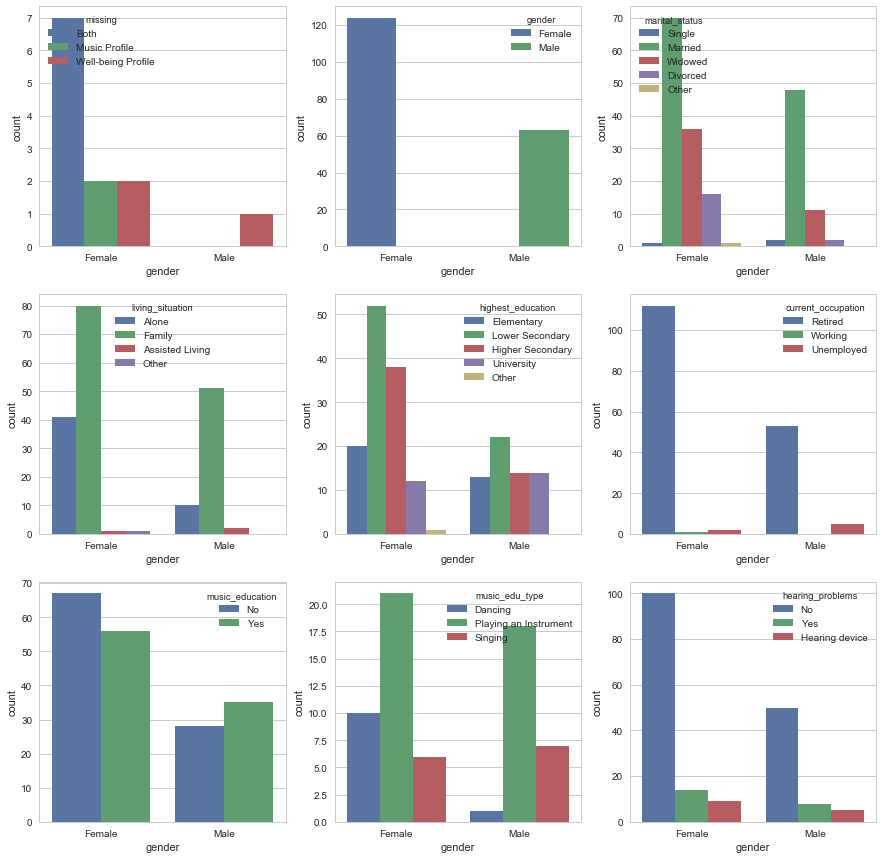

In [77]:
fig, axes = plt.subplots(3, 3, figsize=(15,15))
sns.set(style="whitegrid")

for ax, col in zip(axes.flatten(), cat_col):
    sns.countplot(x="gender", data=music, hue=col, ax=ax)

### Categorical variables across countries

In [72]:
cat_col.insert(2, "gender")
cat_col.remove("countries")

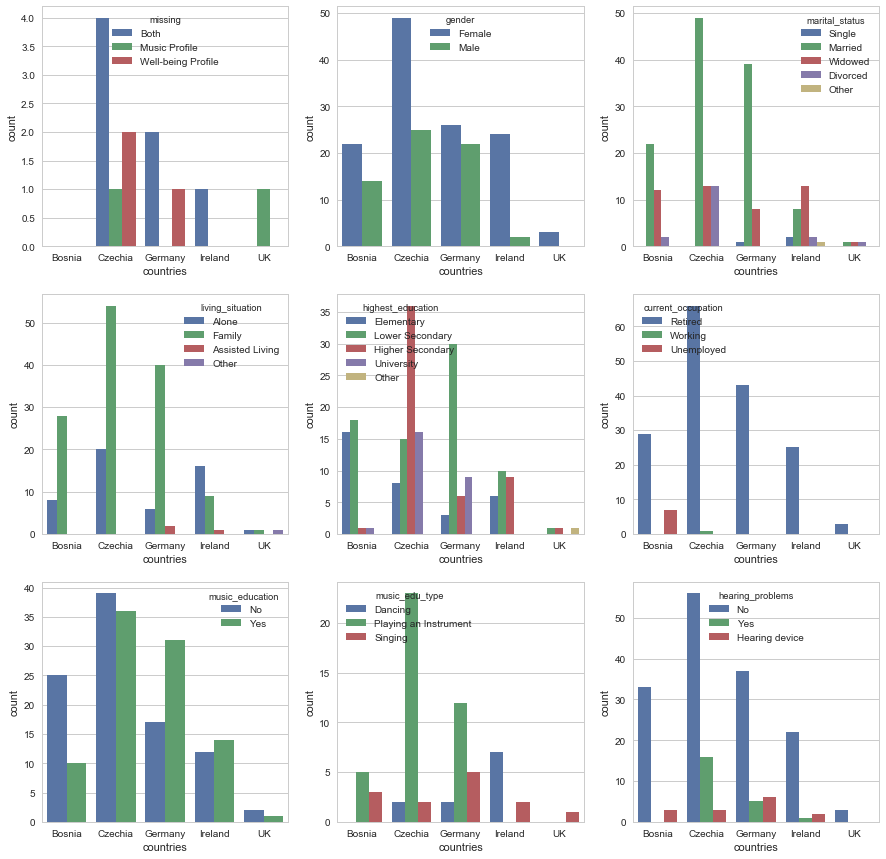

In [78]:
fig, axes = plt.subplots(3, 3, figsize=(15,15))
sns.set(style="whitegrid")

for ax, col in zip(axes.flatten(), cat_col):
    sns.countplot(x="countries", data=music, hue=col, ax=ax)

# NUMERICAL VARIABLES

Participant Profile:
- age
- religiousness
- hobbies: hob_music, hob_internet, hob_tv, hob_crossword, hob_reading, hob_sport, hob_walking, hob_art, hob_gardening, hob_out_meals, hob_out_friends, hob_soc_clubs
- financial_worry
- support: supp_family, supp_friends, supp_sign_other
- personality: extroversion, neuroticism, conscientiousness, agreeableness, openness_exp

Music Profile:
- music_importance
- musical activities: listening_freq, singing_freq, instrument_freq, dancing_freq, listening_minutes
- access_to_music_content
- emotions: emo_to_mus_happy, emo_to_mus_nostalgic, emo_to_mus_moved, emo_to_mus_angry, emo_to_mus_sad, emo_to_mus_thrills, emo_to_mus_relax

Well-being Profile:
- Laukka: laukka_identity_agency, laukka_mood_regulation, laukka_relaxation_company, laukka_enjoyment
- BMRQ: barcelona_total, barcelona_ms, barcelona_ee, barcelona_mr, barcelona_sm, barcelona_sr_without_item6
- PANAS: panas_p, panas_n
- SF: sf_emotional_wb, sf_role_limit_due_emot_probl, sf_general_health
- DERS: ders_strategies, ders_non_acceptance, ders_impulse, ders_goals, ders_awareness, ders_clarity
- CD-RISC: cd_risc_mean
- SWLS: swls_mean


## Descriptive statistics

### Participant Profile

#### Age

In [56]:
music.age.describe()

count    188.000000
mean      73.734043
std        6.019888
min       65.000000
25%       68.750000
50%       73.000000
75%       78.000000
max       87.000000
Name: age, dtype: float64

In [57]:
age_by_gender = music.groupby("gender")["age"].agg(["mean", "std", "min", "max"])

age_by_gender

,mean,std,min,max
gender,,,,
Female,73.790323,5.899255,65.0,87.0
Male,73.507937,6.273017,65.0,85.0


In [58]:
age_by_country = music.groupby("countries")["age"].agg(["mean", "std", "min", "max"])

age_by_country

,mean,std,min,max
countries,,,,
Bosnia,76.027778,5.353163,65.0,86.0
Czechia,72.866667,5.857159,65.0,86.0
Germany,72.812500,6.667343,65.0,87.0
Ireland,74.538462,5.209459,67.0,85.0
UK,75.666667,8.736895,66.0,83.0


#### Religiousness

In [59]:
music.religiousness.describe()

count    185.000000
mean       3.913514
std        1.821693
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        7.000000
Name: religiousness, dtype: float64

In [60]:
rel_by_gender = music.groupby("gender")["religiousness"].agg(["mean", "std", "min", "max"])

rel_by_gender

,mean,std,min,max
gender,,,,
Female,3.892562,1.764472,1.0,7.0
Male,3.952381,1.954553,1.0,7.0


In [61]:
rel_by_country = music.groupby("countries")["religiousness"].agg(["mean", "std", "min", "max"])

rel_by_country

,mean,std,min,max
countries,,,,
Bosnia,4.972222,1.133543,2.0,7.0
Czechia,3.152778,1.804999,1.0,7.0
Germany,3.812500,1.852615,1.0,7.0
Ireland,4.884615,1.505375,1.0,7.0
UK,2.666667,1.527525,1.0,4.0


#### Hobbies

In [62]:
hobbies = ["hob_music", "hob_internet", "hob_tv", 
           "hob_crossword", "hob_reading", "hob_sport", 
           "hob_walking", "hob_art", "hob_gardening", 
           "hob_out_meals", "hob_out_friends", "chob_soc_clubs"]

music[hobbies].describe()

,hob_music,hob_internet,hob_tv,hob_crossword,hob_reading,hob_sport,hob_walking,hob_art,hob_gardening,hob_out_meals,hob_out_friends,chob_soc_clubs
count,180.000000,177.000000,181.000000,182.000000,182.000000,182.000000,186.000000,172.000000,185.000000,184.000000,186.000000,183.000000
mean,5.872222,4.338983,6.519337,4.516484,5.818681,3.049451,5.387097,1.720930,4.518919,3.347826,4.709677,3.278689
std,1.418279,2.460669,1.014293,1.974213,1.575041,2.144703,1.689601,1.321448,2.206935,1.625848,1.624679,2.009301
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.000000,1.000000,6.000000,3.000000,5.000000,1.000000,5.000000,1.000000,2.000000,2.000000,4.000000,1.000000
50%,6.000000,5.000000,7.000000,5.000000,6.000000,2.000000,6.000000,1.000000,5.000000,3.000000,5.000000,3.000000
75%,7.000000,6.000000,7.000000,6.000000,7.000000,5.000000,7.000000,2.000000,6.000000,5.000000,6.000000,5.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


#### Financial worry

In [63]:
music.financial_worry.describe()

count    185.00000
mean       3.32973
std        1.72401
min        1.00000
25%        2.00000
50%        3.00000
75%        5.00000
max        7.00000
Name: financial_worry, dtype: float64

In [64]:
fin_gender = music.groupby("gender")["financial_worry"].agg(["mean", "std", "min", "max"])

fin_gender

,mean,std,min,max
gender,,,,
Female,3.422764,1.769543,1.0,7.0
Male,3.131148,1.637838,1.0,7.0


In [65]:
fin_country = music.groupby("countries")["religiousness"].agg(["mean", "std", "min", "max"])

fin_country

,mean,std,min,max
countries,,,,
Bosnia,4.972222,1.133543,2.0,7.0
Czechia,3.152778,1.804999,1.0,7.0
Germany,3.812500,1.852615,1.0,7.0
Ireland,4.884615,1.505375,1.0,7.0
UK,2.666667,1.527525,1.0,4.0


#### Support

In [66]:
support = ["supp_family", "supp_friends", "supp_sign_other"]

music[support].describe()

,supp_family,supp_friends,supp_sign_other
count,185.000000,184.000000,186.000000
mean,5.875225,5.301178,5.830688
std,1.120668,1.154135,1.178649
min,1.000000,1.000000,1.000000
25%,5.250000,4.687500,5.250000
50%,6.000000,5.250000,6.000000
75%,6.750000,6.000000,7.000000
max,7.000000,7.000000,7.000000


In [67]:
supp_gender = music.groupby("gender")[support].agg(["mean", "std", "min", "max"])

supp_gender

supp_family                      supp_friends                      \
              mean       std   min  max         mean       std  min  max   
gender                                                                     
Female    5.751366  1.233104  1.00  7.0     5.393939  1.141038  1.0  7.0   
Male      6.100806  0.817909  3.75  7.0     5.165323  1.127110  2.5  7.0   

       supp_sign_other                      
                  mean       std  min  max  
gender                                      
Female        5.742690  1.244900  1.0  7.0  
Male          6.006793  1.028762  2.5  7.0

In [68]:
supp_country = music.groupby("countries")[support].agg(["mean", "std", "min", "max"])

supp_country

supp_family                       supp_friends                      \
                 mean       std   min   max         mean       std       min   
countries                                                                      
Bosnia       5.576389  1.243296  2.00  7.00     5.152778  1.071177  3.250000   
Czechia      5.810000  0.991382  2.00  7.00     5.087778  1.089802  2.000000   
Germany      6.190217  1.200908  1.00  7.00     5.679630  1.129544  2.333333   
Ireland      5.986667  1.066015  2.75  7.00     5.440000  1.360300  1.000000   
UK           5.333333  1.181454  4.00  6.25     5.583333  1.376893  4.250000   

               supp_sign_other                       
           max            mean       std   min  max  
countries                                            
Bosnia     7.0        5.451389  1.234648  2.50  7.0  
Czechia    7.0        5.821050  0.924547  2.00  7.0  
Germany    7.0        6.356065  1.225243  1.00  7.0  
Ireland    7.0        5.473086  1.421441  1.00  7.0  
UK         7.0        5.666667  0.721688  5.25  6.5

#### Personality

In [69]:
personality = ["extroversion", "neuroticism", "conscientiousness", "agreeableness", "openness_exp"]

music[personality].describe()

,extroversion,neuroticism,conscientiousness,agreeableness,openness_exp
count,176.000000,182.000000,181.000000,182.000000,179.000000
mean,3.394886,2.906593,4.038674,3.516484,3.620112
std,0.775722,0.947262,0.789618,0.858659,0.877841
min,1.500000,1.000000,1.500000,1.500000,1.000000
25%,3.000000,2.500000,3.500000,3.000000,3.000000
50%,3.500000,3.000000,4.000000,3.500000,3.500000
75%,4.000000,3.500000,4.500000,4.000000,4.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000


In [70]:
pers_gender = music.groupby("gender")[personality].agg(["mean", "std", "min", "max"])

pers_gender

extroversion                     neuroticism                      \
               mean       std  min  max        mean       std  min  max   
gender                                                                    
Female     3.411504  0.788393  1.5  5.0    2.987395  0.926224  1.0  5.0   
Male       3.354839  0.759568  1.5  5.0    2.758065  0.982394  1.0  5.0   

       conscientiousness                     agreeableness                 \
                    mean       std  min  max          mean       std  min   
gender                                                                      
Female          4.070833  0.773228  1.5  5.0      3.656780  0.807812  1.5   
Male            3.975410  0.823743  1.5  5.0      3.253968  0.901938  1.5   

            openness_exp                      
        max         mean       std  min  max  
gender                                        
Female  5.0     3.576923  0.867555  1.0  5.0  
Male    5.0     3.688525  0.899833  1.5  5.0

In [71]:
pers_country = music.groupby("countries")[personality].agg(["mean", "std", "min", "max"])

pers_country

extroversion                     neuroticism                      \
                  mean       std  min  max        mean       std  min  max   
countries                                                                    
Bosnia        3.485714  0.870140  2.0  5.0    3.142857  0.904006  1.0  5.0   
Czechia       3.166667  0.628178  1.5  4.5    3.041096  0.865036  1.0  5.0   
Germany       3.543478  0.835504  1.5  5.0    2.776596  1.020489  1.0  5.0   
Ireland       3.673913  0.777652  2.5  5.0    2.500000  0.932505  1.0  4.0   
UK            3.166667  0.763763  2.5  4.0    2.166667  1.258306  1.0  3.5   

          conscientiousness                     agreeableness                 \
                       mean       std  min  max          mean       std  min   
countries                                                                      
Bosnia             3.842857  0.811421  1.5  5.0      3.828571  0.821967  2.0   
Czechia            3.936620  0.819100  1.5  5.0      3.281690  0.791619  1.5   
Germany            4.187500  0.665447  2.5  5.0      3.276596  0.806283  1.5   
Ireland            4.375000  0.797414  3.0  5.0      4.096154  0.787645  2.5   
UK                 3.666667  0.763763  3.0  4.5      4.166667  0.763763  3.5   

               openness_exp                      
           max         mean       std  min  max  
countries                                        
Bosnia     5.0     3.328571  0.756762  1.5  5.0  
Czechia    5.0     3.678082  0.778932  1.5  5.0  
Germany    4.5     3.882979  0.973635  1.5  5.0  
Ireland    5.0     3.357143  1.038543  1.0  5.0  
UK         5.0     3.333333  0.577350  3.0  4.0

### Music Profile

#### Music importance

In [72]:
music.music_importance.describe()

count    187.000000
mean       5.294118
std        1.309238
min        1.000000
25%        4.000000
50%        5.000000
75%        6.000000
max        7.000000
Name: music_importance, dtype: float64

In [73]:
imp_gender = music.groupby("gender")["music_importance"].agg(["mean", "std", "min", "max"])

imp_gender

,mean,std,min,max
gender,,,,
Female,5.349593,1.366962,2.0,7.0
Male,5.190476,1.202915,1.0,7.0


In [74]:
imp_country = music.groupby("countries")["music_importance"].agg(["mean", "std", "min", "max"])

imp_country

,mean,std,min,max
countries,,,,
Bosnia,5.555556,1.205806,3.0,7.0
Czechia,4.933333,1.222905,2.0,7.0
Germany,5.276596,1.297190,1.0,7.0
Ireland,5.846154,1.461296,2.0,7.0
UK,6.666667,0.577350,6.0,7.0


#### Musical activities

In [75]:
activities = ["listening_freq", "singing_freq", "instrument_freq", "dancing_freq", "listening_minutes"]

music[activities].describe()

,listening_freq,singing_freq,instrument_freq,dancing_freq,listening_minutes
count,188.000000,182.000000,176.000000,178.000000,169.000000
mean,6.393617,3.758242,1.585227,2.050562,134.526627
std,1.020832,2.168793,1.423721,1.240888,117.739425
min,2.000000,1.000000,1.000000,1.000000,0.000000
25%,6.000000,2.000000,1.000000,1.000000,60.000000
50%,7.000000,4.000000,1.000000,2.000000,120.000000
75%,7.000000,6.000000,1.000000,2.000000,180.000000
max,7.000000,7.000000,7.000000,7.000000,600.000000


In [76]:
act_gender = music.groupby("gender")[activities].agg(["mean", "std", "min", "max"])

act_gender

listening_freq                     singing_freq                      \
                 mean       std  min  max         mean       std  min  max   
gender                                                                       
Female       6.362903  1.076993  2.0  7.0     3.813559  2.203141  1.0  7.0   
Male         6.460317  0.912731  3.0  7.0     3.619048  2.113158  1.0  7.0   

       instrument_freq                     dancing_freq                      \
                  mean       std  min  max         mean       std  min  max   
gender                                                                        
Female        1.526786  1.388238  1.0  7.0     2.219298  1.374604  1.0  7.0   
Male          1.698413  1.498762  1.0  7.0     1.761905  0.892880  1.0  5.0   

       listening_minutes                                    
                    mean         std            min    max  
gender                                                      
Female        135.720721  113.669871   0.000000e+00  540.0  
Male          133.508772  126.903243  1.200000e-238  600.0

In [77]:
act_country = music.groupby("countries")[activities].agg(["mean", "std", "min", "max"])

act_country

listening_freq                     singing_freq                      \
                    mean       std  min  max         mean       std  min  max   
countries                                                                       
Bosnia          6.527778  0.940702  3.0  7.0     4.250000  2.195775  1.0  7.0   
Czechia         6.280000  1.034016  2.0  7.0     3.700000  2.142395  1.0  7.0   
Germany         6.520833  0.898926  3.0  7.0     3.770833  1.915664  1.0  7.0   
Ireland         6.269231  1.313246  2.0  7.0     3.240000  2.554082  1.0  7.0   
UK              6.666667  0.577350  6.0  7.0     3.333333  3.214550  1.0  7.0   

          instrument_freq                     dancing_freq                 \
                     mean       std  min  max         mean       std  min   
countries                                                                   
Bosnia           1.527778  1.253250  1.0  6.0     2.361111  1.268357  1.0   
Czechia          1.731343  1.610403  1.0  7.0     1.691176  1.068649  1.0   
Germany          1.586957  1.438766  1.0  7.0     1.829787  0.939916  1.0   
Ireland          1.333333  1.167184  1.0  6.0     3.125000  1.541104  1.0   
UK               1.000000  0.000000  1.0  1.0     1.333333  0.577350  1.0   

               listening_minutes                                    
           max              mean         std            min    max  
countries                                                           
Bosnia     6.0        141.515152   91.382480   6.000000e+01  360.0  
Czechia    6.0        143.174603  128.503488  1.200000e-178  600.0  
Germany    5.0        112.021277  108.611091   0.000000e+00  480.0  
Ireland    7.0        146.086957  144.245344   0.000000e+00  540.0  
UK         2.0        140.000000   45.825757   9.000000e+01  180.0

#### Access to music

In [78]:
music.access_to_music_content.describe()

count    186.000000
mean       5.569892
std        1.198177
min        2.000000
25%        5.000000
50%        6.000000
75%        6.000000
max        7.000000
Name: access_to_music_content, dtype: float64

In [79]:
access_gender = music.groupby("gender")["access_to_music_content"].agg(["mean", "std", "min", "max"])

access_gender

,mean,std,min,max
gender,,,,
Female,5.500000,1.213072,2.0,7.0
Male,5.709677,1.164884,2.0,7.0


In [80]:
access_country = music.groupby("countries")["access_to_music_content"].agg(["mean", "std", "min", "max"])

access_country

,mean,std,min,max
countries,,,,
Bosnia,5.416667,0.840918,3.0,6.0
Czechia,5.397260,1.221790,2.0,7.0
Germany,5.625000,1.265332,2.0,7.0
Ireland,6.000000,1.326650,2.0,7.0
UK,7.000000,0.000000,7.0,7.0


#### Emotions

In [81]:
emotions = ["emo_to_mus_happy", "emo_to_mus_nostalgic", "emo_to_mus_moved", 
            "emo_to_mus_angry", "emo_to_mus_sad", "emo_to_mus_thrills", "emo_to_mus_relax"]

music[emotions].describe()

,emo_to_mus_happy,emo_to_mus_nostalgic,emo_to_mus_moved,emo_to_mus_angry,emo_to_mus_sad,emo_to_mus_thrills,emo_to_mus_relax
count,183.000000,179.000000,180.000000,173.000000,179.000000,178.00000,186.000000
mean,5.158470,4.402235,3.922222,1.849711,2.754190,3.44382,5.037634
std,1.250065,1.291805,1.351414,1.000269,1.400611,1.50693,1.168821
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
25%,4.000000,4.000000,3.000000,1.000000,2.000000,2.00000,4.000000
50%,5.000000,4.000000,4.000000,2.000000,3.000000,4.00000,5.000000
75%,6.000000,5.000000,5.000000,3.000000,4.000000,4.00000,6.000000
max,7.000000,7.000000,7.000000,5.000000,7.000000,7.00000,7.000000


### Well-being

#### Laukka

In [82]:
laukka = ["laukka_identity_agency", "laukka_mood_regulation", "laukka_relaxation_company", "laukka_enjoyment"]

music[laukka].describe()

,laukka_identity_agency,laukka_mood_regulation,laukka_relaxation_company,laukka_enjoyment
count,176.000000,180.000000,180.000000,168.000000
mean,2.185795,3.040556,2.843889,4.041667
std,0.957865,0.745158,0.817727,0.614000
min,1.000000,1.333333,1.000000,2.250000
25%,1.333333,2.500000,2.400000,3.750000
50%,2.166667,3.000000,2.800000,4.000000
75%,2.700000,3.500000,3.287500,4.500000
max,5.000000,5.000000,5.000000,5.000000


#### Barcelona Music Reward Questionnaire

In [83]:
bmrq = ["barcelona_total", "barcelona_ms", "barcelona_ee", 
        "barcelona_mr", "barcelona_sm", "barcelona_sr_without_item6"]

music[bmrq].describe()

,barcelona_total,barcelona_ms,barcelona_ee,barcelona_mr,barcelona_sm,barcelona_sr_without_item6
count,180.000000,173.000000,172.000000,177.000000,177.000000,180.000000
mean,3.458429,3.028902,3.520349,3.889831,3.577684,3.248148
std,0.490773,0.762895,0.743603,0.573326,0.826133,0.858103
min,2.000000,1.250000,1.000000,1.500000,1.000000,1.000000
25%,3.200000,2.500000,3.000000,3.750000,3.000000,2.666667
50%,3.500000,3.000000,3.750000,4.000000,3.750000,3.333333
75%,3.800000,3.500000,4.000000,4.250000,4.000000,4.000000
max,4.650000,5.000000,5.000000,5.000000,5.000000,5.000000


#### PANAS

In [84]:
panas = ["panas_p", "panas_n"]

music[panas].describe()

,panas_p,panas_n
count,160.000000,162.000000
mean,28.856250,17.888889
std,8.178701,6.347103
min,10.000000,10.000000
25%,23.000000,13.000000
50%,30.000000,17.000000
75%,34.000000,22.000000
max,48.000000,37.000000


#### SF

In [85]:
sf = ["sf_emotional_wb", "sf_role_limit_due_emot_probl", "sf_general_health"]

music[sf].describe()

,sf_emotional_wb,sf_role_limit_due_emot_probl,sf_general_health
count,186.000000,176.000000,184.000000
mean,27.274194,31.818182,40.828804
std,16.551152,35.602422,14.753527
min,0.000000,0.000000,10.000000
25%,16.000000,0.000000,30.000000
50%,24.000000,33.333333,40.000000
75%,36.000000,66.666667,55.000000
max,80.000000,100.000000,80.000000


#### DERS

In [86]:
ders = ["ders_strategies", "ders_non_acceptance", "ders_impulse", "ders_goals", "ders_awareness", "ders_clarity"]

music[ders].describe()

,ders_strategies,ders_non_acceptance,ders_impulse,ders_goals,ders_awareness,ders_clarity
count,178.000000,178.000000,176.000000,178.000000,177.000000,175.000000
mean,1.840824,1.936330,1.630682,2.307116,3.052731,1.838095
std,0.748470,0.852420,0.730709,0.955014,0.969735,0.653957
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.333333,1.333333,1.000000,1.666667,2.333333,1.333333
50%,1.666667,2.000000,1.333333,2.000000,3.000000,1.666667
75%,2.000000,2.333333,2.000000,3.000000,4.000000,2.333333
max,4.333333,4.666667,4.666667,5.000000,5.000000,4.000000


#### CD-RISC

In [87]:
music.cd_risc_mean.describe()

count    183.000000
mean       3.558956
std        0.662878
min        1.300000
25%        3.100000
50%        3.500000
75%        3.900000
max        5.000000
Name: cd_risc_mean, dtype: float64

#### SWLS

In [88]:
music.swls_mean.describe()

count    183.000000
mean       4.834426
std        1.136780
min        1.400000
25%        4.200000
50%        5.000000
75%        5.600000
max        7.000000
Name: swls_mean, dtype: float64

## Figures

### Participant Profile

#### Age

Text(0.5,0,'Age')

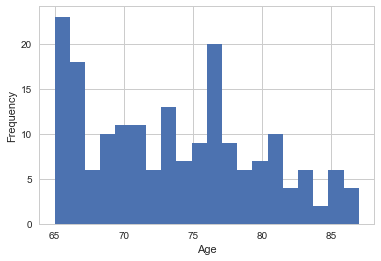

In [89]:
music.age.plot(kind="hist", bins=20)
plt.xlabel("Age")

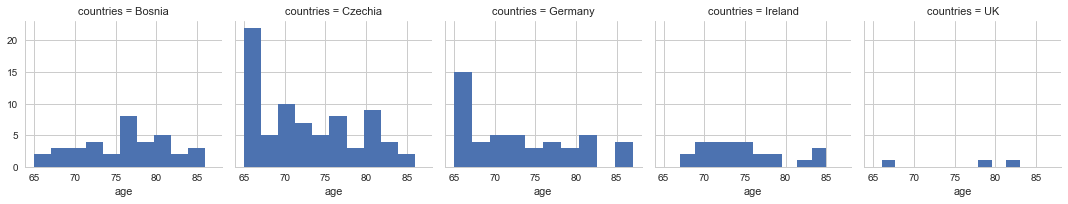

In [90]:
a = sns.FacetGrid(music, col="countries")
a.map(plt.hist, "age")

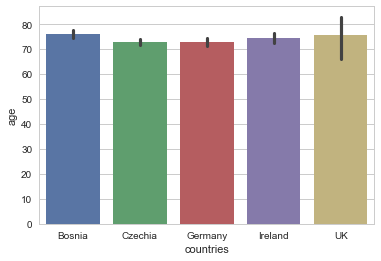

In [91]:
sns.barplot(x="countries", y="age", data=music)

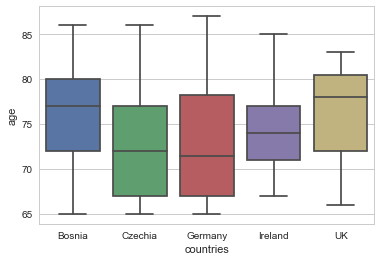

In [92]:
sns.boxplot(x="countries", y="age", data=music)

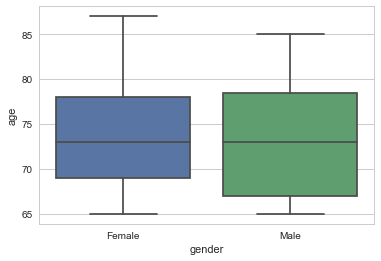

In [93]:
sns.boxplot(x="gender", y="age", data=music)

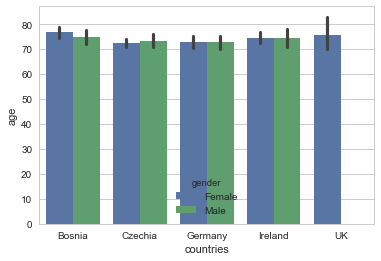

In [94]:
sns.barplot(x="countries", y="age", hue="gender", data=music)

#### Religiousness

Text(0.5,0,'Religiousness')

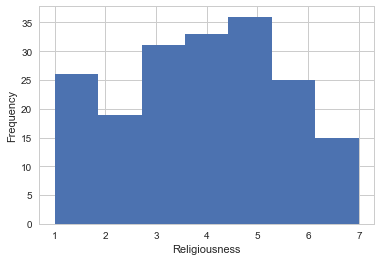

In [95]:
music.religiousness.plot(kind="hist", bins=7)
plt.xlabel("Religiousness")

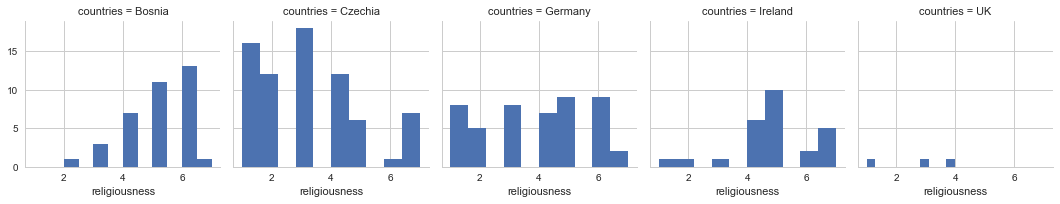

In [96]:
c = sns.FacetGrid(music, col="countries")
c.map(plt.hist, "religiousness")

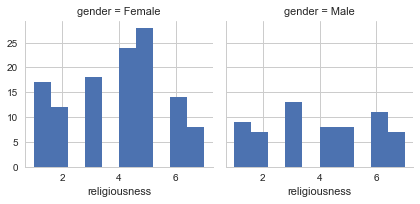

In [97]:
g = sns.FacetGrid(music, col="gender")
g.map(plt.hist, "religiousness")

#### Hobbies

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


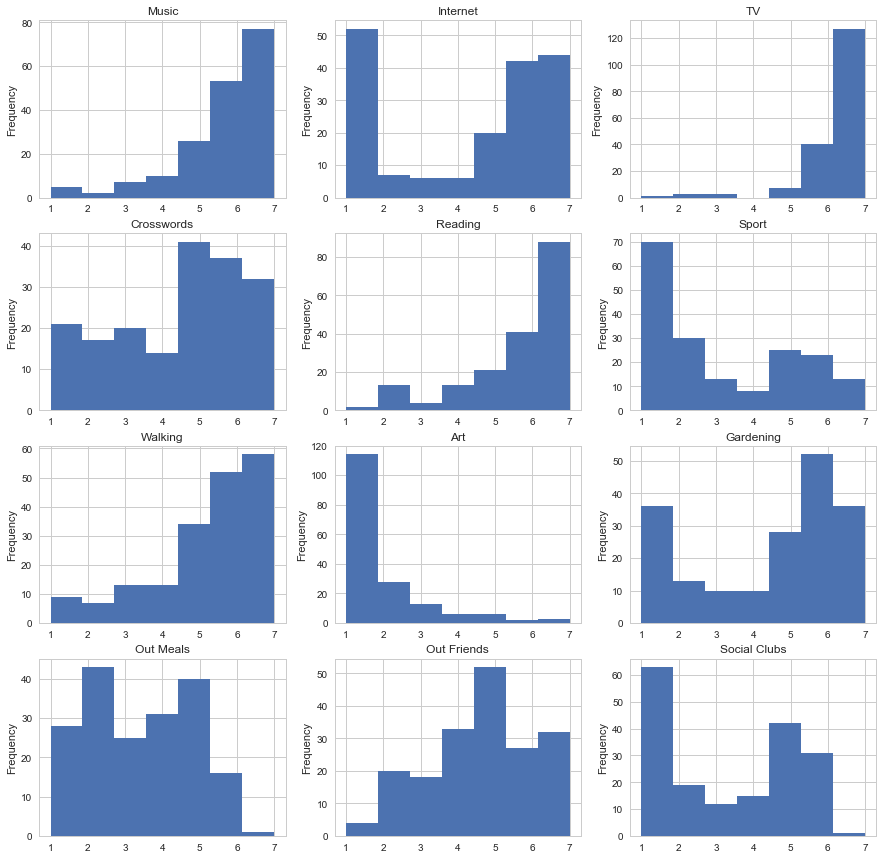

In [98]:
fig, ax = plt.subplots(4,3, figsize=(15,15))

music.hob_music.plot(kind="hist", bins=7, ax=ax[0,0]).title.set_text("Music")
music.hob_internet.plot(kind="hist", bins=7, ax=ax[0,1]).title.set_text("Internet")
music.hob_tv.plot(kind="hist", bins=7, ax=ax[0,2]).title.set_text("TV")
music.hob_crossword.plot(kind="hist", bins=7, ax=ax[1,0]).title.set_text("Crosswords")
music.hob_reading.plot(kind="hist", bins=7, ax=ax[1,1]).title.set_text("Reading")
music.hob_sport.plot(kind="hist", bins=7, ax=ax[1,2]).title.set_text("Sport")
music.hob_walking.plot(kind="hist", bins=7, ax=ax[2,0]).title.set_text("Walking")
music.hob_art.plot(kind="hist", bins=7, ax=ax[2,1]).title.set_text("Art")
music.hob_gardening.plot(kind="hist", bins=7, ax=ax[2,2]).title.set_text("Gardening")
music.hob_out_meals.plot(kind="hist", bins=7, ax=ax[3,0]).title.set_text("Out Meals")
music.hob_out_friends.plot(kind="hist", bins=7, ax=ax[3,1]).title.set_text("Out Friends")
music.chob_soc_clubs.plot(kind="hist", bins=7, ax=ax[3,2]).title.set_text("Social Clubs")

fig.show()

#### Financial worry

Text(0.5,0,'Financial Worry')

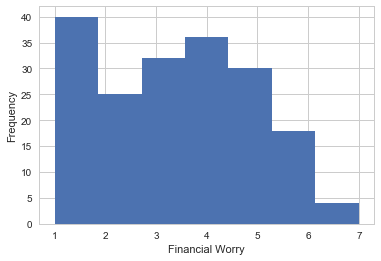

In [99]:
music.financial_worry.plot(kind="hist", bins=7)
plt.xlabel("Financial Worry")

#### Support

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


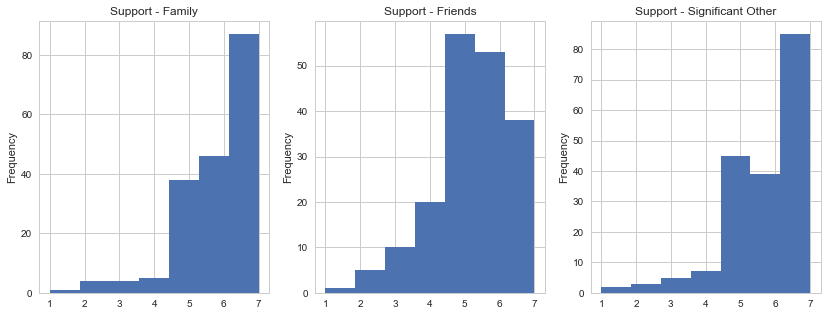

In [100]:
fig, axes = plt.subplots(1,3, figsize=(14,5), squeeze=False)

music["supp_family"].plot(kind="hist", bins=7, ax=axes[0,0]).title.set_text("Support - Family")
music["supp_friends"].plot(kind="hist", bins=7, ax=axes[0,1]).title.set_text("Support - Friends")
music["supp_sign_other"].plot(kind="hist", bins=7, ax=axes[0,2]).title.set_text("Support - Significant Other")

fig.show()

#### Personality

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


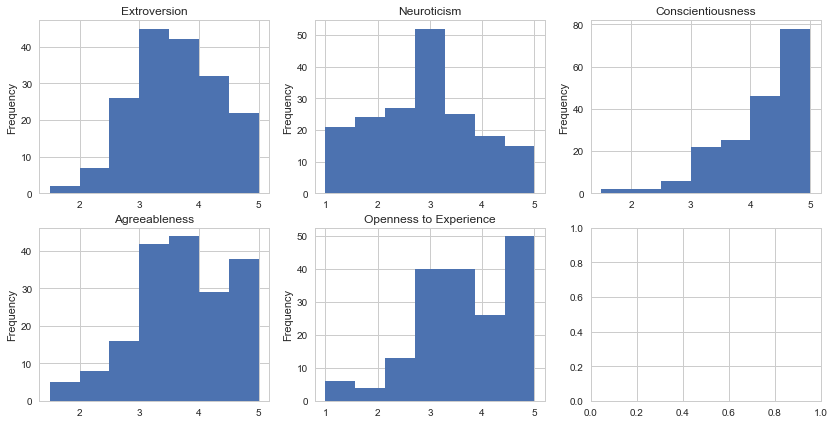

In [101]:
fig, axes = plt.subplots(2,3, figsize=(14,7))

music["extroversion"].plot(kind="hist", bins=7, ax=axes[0,0]).title.set_text("Extroversion")
music["neuroticism"].plot(kind="hist", bins=7, ax=axes[0,1]).title.set_text("Neuroticism")
music["conscientiousness"].plot(kind="hist", bins=7, ax=axes[0,2]).title.set_text("Conscientiousness")
music["agreeableness"].plot(kind="hist", bins=7, ax=axes[1,0]).title.set_text("Agreeableness")
music["openness_exp"].plot(kind="hist", bins=7, ax=axes[1,1]).title.set_text("Openness to Experience")

fig.show()


### Music Profile

#### Music Importance

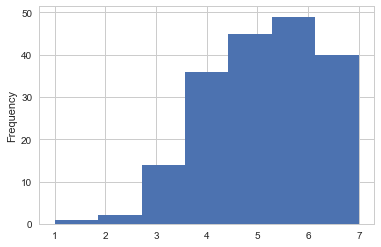

In [102]:
music.music_importance.plot(kind="hist", bins=7)

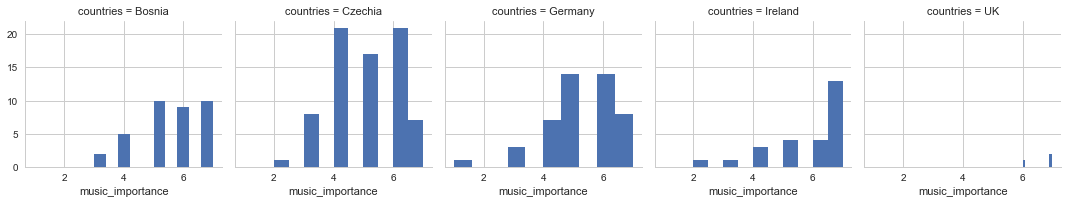

In [103]:
i = sns.FacetGrid(music, col="countries")
i.map(plt.hist, "music_importance")

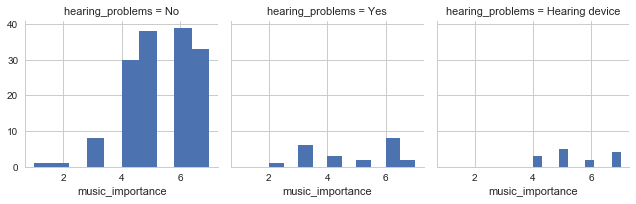

In [104]:
ih = sns.FacetGrid(music, col="hearing_problems")
ih.map(plt.hist, "music_importance")

#### Musical Activities

([<matplotlib.axis.XTick at 0x1a21553588>,
 <a list of 7 Text xticklabel objects>)

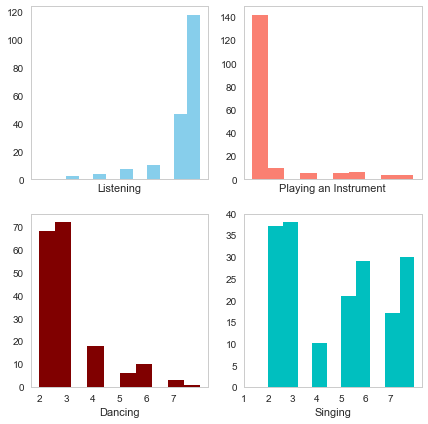

In [105]:
f, axes = plt.subplots(2,2, figsize=(7,7), sharex=True)
ax1 = music["listening_freq"].hist(ax=axes[0,0], color="skyblue", grid=False)
ax2 = music["instrument_freq"].hist(ax=axes[0,1], color="salmon", grid=False)
ax3 = music["dancing_freq"].hist(ax=axes[1,0], color="maroon", grid=False)
ax4 = music["singing_freq"].hist(ax=axes[1,1], color="c", grid=False)

ax1.set_xlabel("Listening")
ax2.set_xlabel("Playing an Instrument")
ax3.set_xlabel("Dancing")
ax4.set_xlabel("Singing")

plt.xticks(range(7), [1,2,3,4,5,6,7])

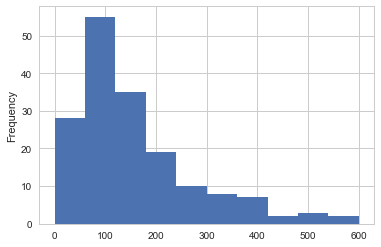

In [106]:
music.listening_minutes.plot(kind="hist")

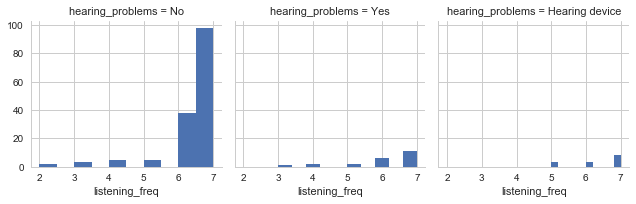

In [107]:
l = sns.FacetGrid(music, col="hearing_problems")
l.map(plt.hist, "listening_freq")

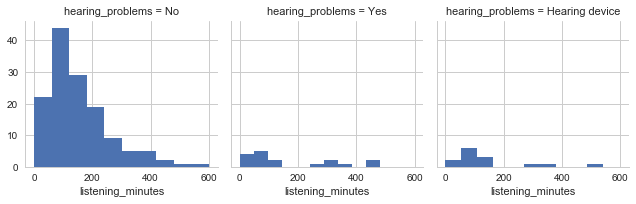

In [108]:
k = sns.FacetGrid(music, col="hearing_problems")
k.map(plt.hist, "listening_minutes")

#### Access to Music

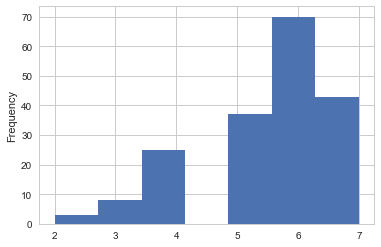

In [109]:
music.access_to_music_content.plot(kind="hist", bins=7)

#### Emotions evoked by music

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


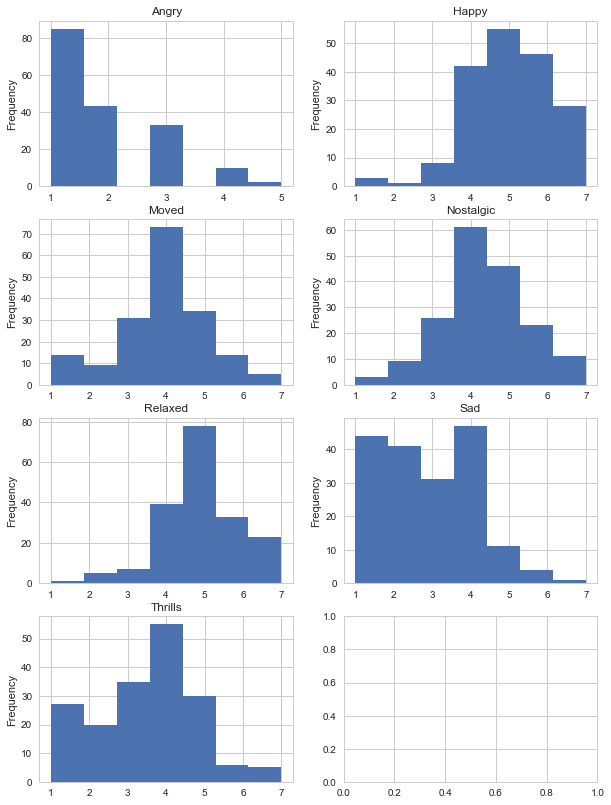

In [110]:
fig, ax = plt.subplots(4,2, figsize=(10,14))

music.emo_to_mus_angry.plot(kind="hist", bins=7, ax=ax[0,0]).title.set_text("Angry")
music.emo_to_mus_happy.plot(kind="hist", bins=7, ax=ax[0,1]).title.set_text("Happy")
music.emo_to_mus_moved.plot(kind="hist", bins=7, ax=ax[1,0]).title.set_text("Moved")
music.emo_to_mus_nostalgic.plot(kind="hist", bins=7, ax=ax[1,1]).title.set_text("Nostalgic")
music.emo_to_mus_relax.plot(kind="hist", bins=7, ax=ax[2,0]).title.set_text("Relaxed")
music.emo_to_mus_sad.plot(kind="hist", bins=7, ax=ax[2,1]).title.set_text("Sad")
music.emo_to_mus_thrills.plot(kind="hist", bins=7, ax=ax[3,0]).title.set_text("Thrills")

fig.show()

### Well-being Profile

#### Laukka

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


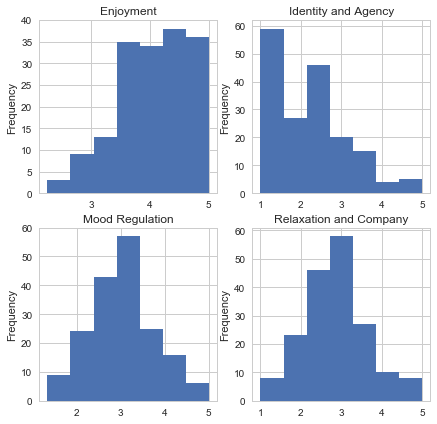

In [111]:
fig, ax = plt.subplots(2,2, figsize=(7,7))

music.laukka_enjoyment.plot(kind="hist", bins=7, ax=ax[0,0]).title.set_text("Enjoyment")
music.laukka_identity_agency.plot(kind="hist", bins=7, ax=ax[0,1]).title.set_text("Identity and Agency")
music.laukka_mood_regulation.plot(kind="hist", bins=7, ax=ax[1,0]).title.set_text("Mood Regulation")
music.laukka_relaxation_company.plot(kind="hist", bins=7, ax=ax[1,1]).title.set_text("Relaxation and Company")

fig.show()

#### BMRQ

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


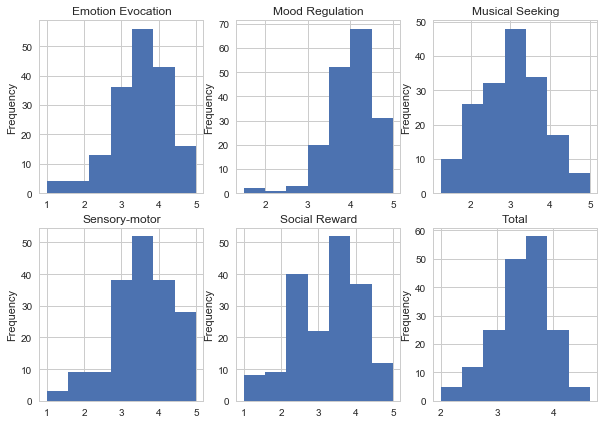

In [112]:
fig, ax = plt.subplots(2,3, figsize=(10,7))

music.barcelona_ee.plot(kind="hist", bins=7, ax=ax[0,0]).title.set_text("Emotion Evocation")
music.barcelona_mr.plot(kind="hist", bins=7, ax=ax[0,1]).title.set_text("Mood Regulation")
music.barcelona_ms.plot(kind="hist", bins=7, ax=ax[0,2]).title.set_text("Musical Seeking")
music.barcelona_sm.plot(kind="hist", bins=7, ax=ax[1,0]).title.set_text("Sensory-motor")
music.barcelona_sr_without_item6.plot(kind="hist", bins=7, ax=ax[1,1]).title.set_text("Social Reward")
music.barcelona_total.plot(kind="hist", bins=7, ax=ax[1,2]).title.set_text("Total")

fig.show()

#### PANAS

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


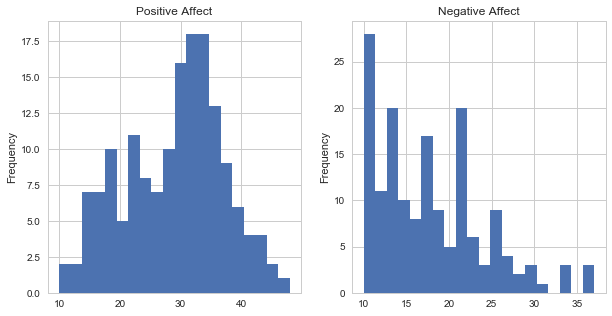

In [113]:
fig, ax = plt.subplots(1,2, figsize=(10,5), squeeze=False)

music.panas_p.plot(kind="hist", bins=20, ax=ax[0,0]).title.set_text("Positive Affect")
music.panas_n.plot(kind="hist", bins=20, ax=ax[0,1]).title.set_text("Negative Affect")

fig.show()

#### SF

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


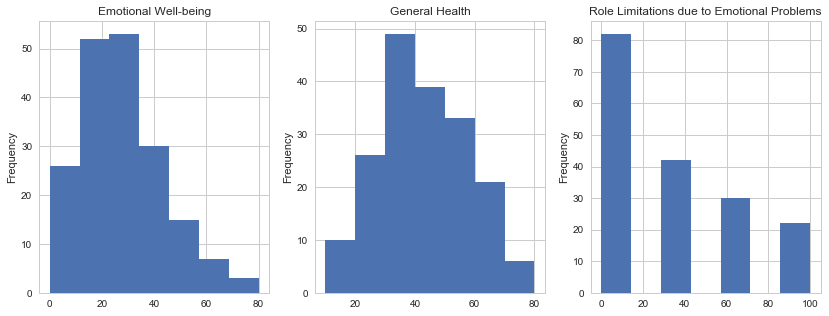

In [114]:
fig, ax = plt.subplots(1,3, figsize=(14,5), squeeze=False)

music.sf_emotional_wb.plot(kind="hist", bins=7, ax=ax[0,0]).title.set_text("Emotional Well-being")
music.sf_general_health.plot(kind="hist", bins=7, ax=ax[0,1]).title.set_text("General Health")
music.sf_role_limit_due_emot_probl.plot(kind="hist", bins=7, ax=ax[0,2]).title.set_text("Role Limitations due to Emotional Problems")

fig.show()

#### DERS

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


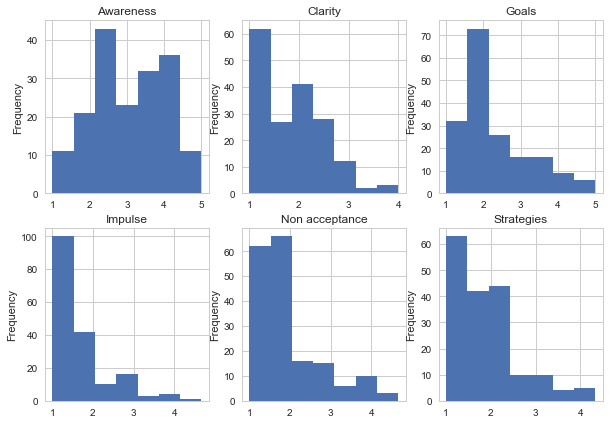

In [115]:
fig, ax = plt.subplots(2,3, figsize=(10,7))

music.ders_awareness.plot(kind="hist", bins=7, ax=ax[0,0]).title.set_text("Awareness")
music.ders_clarity.plot(kind="hist", bins=7, ax=ax[0,1]).title.set_text("Clarity")
music.ders_goals.plot(kind="hist", bins=7, ax=ax[0,2]).title.set_text("Goals")
music.ders_impulse.plot(kind="hist", bins=7, ax=ax[1,0]).title.set_text("Impulse")
music.ders_non_acceptance.plot(kind="hist", bins=7, ax=ax[1,1]).title.set_text("Non acceptance")
music.ders_strategies.plot(kind="hist", bins=7, ax=ax[1,2]).title.set_text("Strategies")

fig.show()

#### CD-RISC

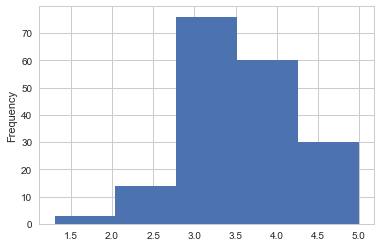

In [116]:
music.cd_risc_mean.plot(kind="hist", bins=5)

#### SWLS

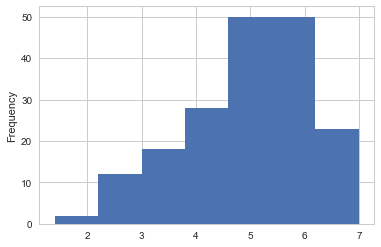

In [117]:
music.swls_mean.plot(kind="hist", bins=7)

## Correlations

### Well-being measures

In [118]:
wb = ["panas_p", "panas_n", 
      "sf_emotional_wb", "sf_role_limit_due_emot_probl", "sf_general_health", 
      "ders_strategies", "ders_non_acceptance", "ders_impulse", "ders_goals", "ders_awareness", "ders_clarity",
      "cd_risc_mean",
      "swls_mean"]

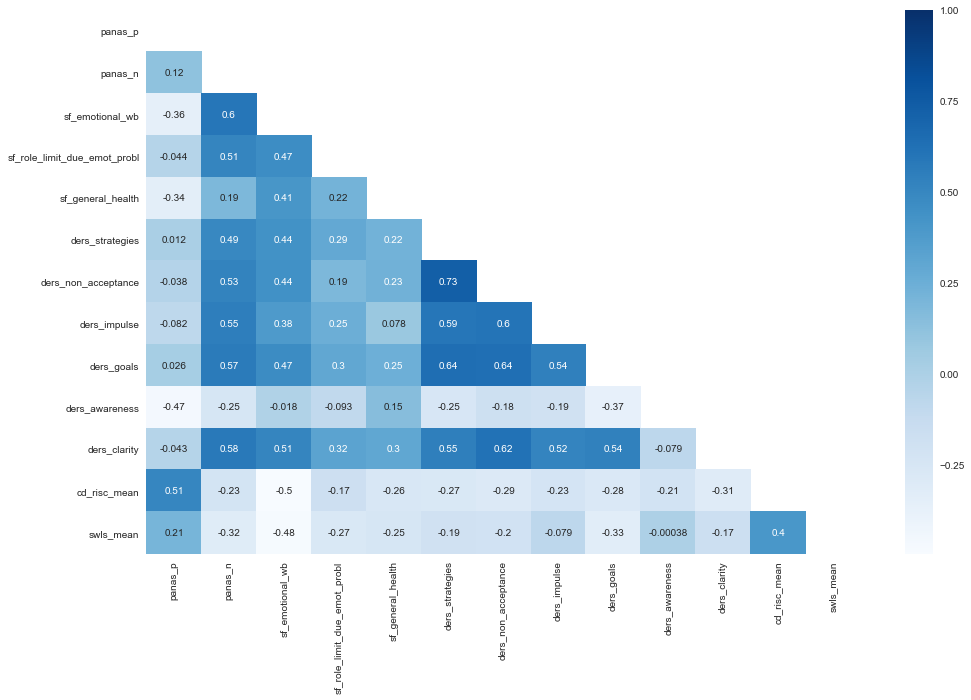

In [120]:
cor = music[wb].dropna().corr()

mask = np.zeros_like(cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (16,10))
sns.heatmap(cor, cmap=plt.cm.Blues, annot=True, annot_kws={"size":10}, mask=mask)

### Well-being measures with BMRQ

In [121]:
barcelona_wb = bmrq + wb

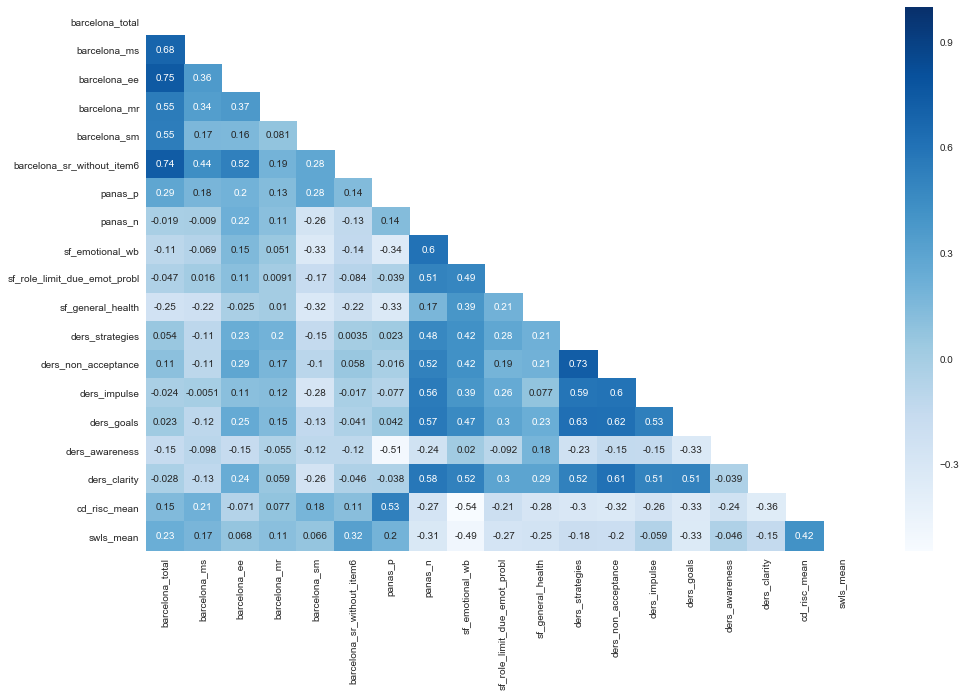

In [122]:
cor2 = music[barcelona_wb].dropna().corr()

mask = np.zeros_like(cor2, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (16,10))
sns.heatmap(cor2, cmap=plt.cm.Blues, annot=True, annot_kws={"size":10}, mask=mask)